# Is There a Cat in the Dat ? 
By : Hesdham Asem

______

a simple clean data , which depend on categorical featurs , & we need to classify it to know whether there will be a cat or not

let's start by importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb


then read the data

In [2]:
train = pd.read_csv('../input/cat-in-the-dat/train.csv')  
test = pd.read_csv('../input/cat-in-the-dat/test.csv')  

print(f'Train data Shape is {train.shape}')
print(f'Test data Shape is {test.shape}')

Train data Shape is (300000, 25)
Test data Shape is (200000, 24)


300K sample size for training & 200K for testing , great . 

now to define needed functions

In [3]:
def Drop(feature) :
    global data
    data.drop([feature],axis=1, inplace=True)
    data.head()
    
def UniqueAll(show_value = True) : 
    global data
    for col in data.columns : 
        print(f'Length of unique data for   {col}   is    {len(data[col].unique())} ')
        if show_value == True  : 
            print(f'unique values ae {data[col].unique()}' )
            print('-----------------------------')
            
def Encoder(feature , new_feature, drop = True) : 
    global data
    enc  = LabelEncoder()
    enc.fit(data[feature])
    data[new_feature] = enc.transform(data[feature])
    if drop == True : 
        data.drop([feature],axis=1, inplace=True)
        
def CPlot(feature) : 
    global data
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
    
def Mapp(feature , new_feature ,f_dict, drop_feature = True) : 
    global data
    data[new_feature] = data[feature].map(f_dict)
    if drop_feature == True : 
        data.drop([feature],axis=1, inplace=True)
    else :
        data.head()
def Unique(feature) : 
    global data
    print(f'Number of unique vaure are {len(list(data[feature].unique()))} which are : \n {list(data[feature].unique())}')

____

as usual , start with heading data to have a look to it 

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


& here is test data

In [5]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


____

# Forming the Data

since this example depend on categorical data , we have to slice features (X) from output (y) from training data , then concatenate X from training data to features from text data . 

& this step to make same data processing (like label encoder & so ) for all features 

so first to slice X_train & X_test

In [6]:
X_train = train.drop(['id' , 'target'], axis=1, inplace=False)
X_test = test.drop(['id'], axis=1, inplace=False)

X_train.shape , X_test.shape

((300000, 23), (200000, 23))

now to concatenate them together into X

In [7]:
X = pd.concat([X_train , X_test])
X.shape

(500000, 23)

how it looks ? 

In [8]:
X.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


______

# Data Processing


no we'll call it data , so it be suitable for all functions we define , which depend on global data

In [9]:
data = X

now for plotting some features , to be sure its values are well represented

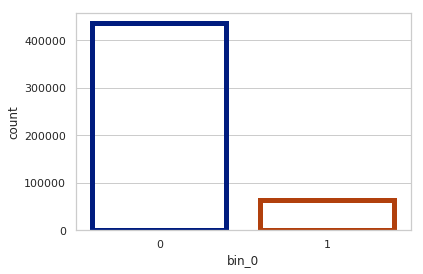

In [10]:
CPlot('bin_0')

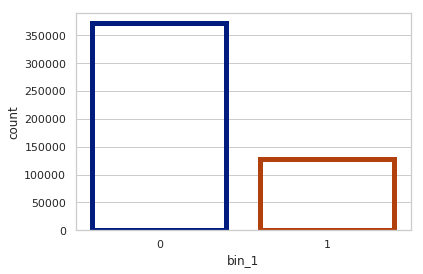

In [11]:
CPlot('bin_1')

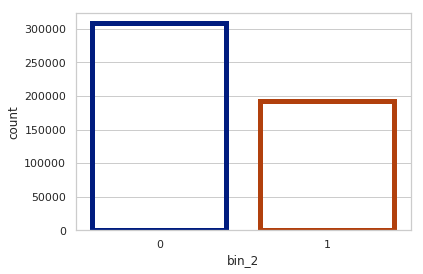

In [12]:
CPlot('bin_2')

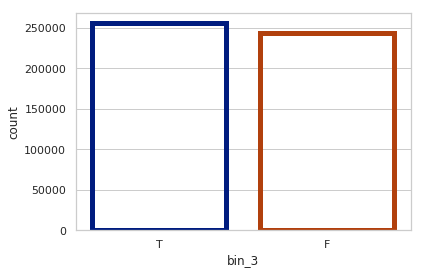

In [13]:
CPlot('bin_3')

_____

great . 

for bin 3 , since it got T for True & F for False , let's map it to new feature bin 03, with values 1 , 0

In [14]:
Mapp('bin_3' , 'bin_03' , {'T':1 , 'F':0} , True)

how it looks now

In [15]:
data.head()

,bin_0,bin_1,bin_2,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_03
0,0,0,0,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,1
1,0,1,0,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,1
2,0,0,0,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,0
4,0,0,0,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


plot it 

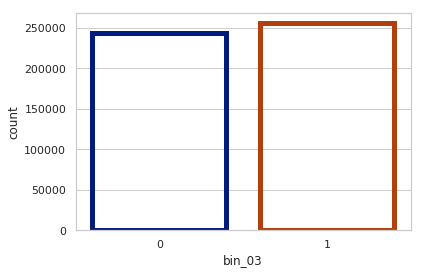

In [16]:
CPlot('bin_03')

____

we'll repeat it for bin 4 , Yes & No will be 1 & 0

In [17]:
Mapp('bin_4' , 'bin_04' , {'Y':1 , 'N':0} , True)

plot it

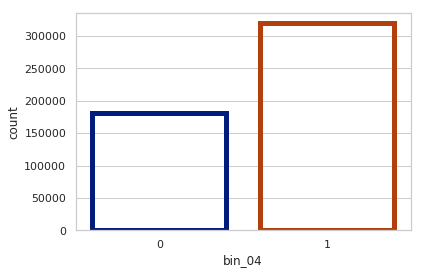

In [18]:
CPlot('bin_04')

_____

& since we use number of unique values for feature on alot of things , let's show them 

In [19]:
UniqueAll(False)

Length of unique data for   bin_0   is    2 
Length of unique data for   bin_1   is    2 
Length of unique data for   bin_2   is    2 
Length of unique data for   nom_0   is    3 
Length of unique data for   nom_1   is    6 
Length of unique data for   nom_2   is    6 
Length of unique data for   nom_3   is    6 
Length of unique data for   nom_4   is    4 
Length of unique data for   nom_5   is    222 
Length of unique data for   nom_6   is    522 
Length of unique data for   nom_7   is    1220 
Length of unique data for   nom_8   is    2219 
Length of unique data for   nom_9   is    12068 
Length of unique data for   ord_0   is    3 
Length of unique data for   ord_1   is    5 
Length of unique data for   ord_2   is    6 
Length of unique data for   ord_3   is    15 
Length of unique data for   ord_4   is    26 
Length of unique data for   ord_5   is    192 
Length of unique data for   day   is    7 
Length of unique data for   month   is    12 
Length of unique data for   bin_03   i

looks fine , may be except few features which got a high number of unique values , so it might not be very helpful in training

_____

# Label Encoding

now we need to apply label encoding to some categorical features , so it be ready for training 

let's start with features : 'nom_0' , 'nom_1' , 'nom_2' , 'nom_3' , 'nom_4'


In [20]:
for C in ['nom_0' , 'nom_1' , 'nom_2' , 'nom_3' , 'nom_4'] : 
    enc  = LabelEncoder()
    enc.fit(X[C])
    X[C] = enc.transform(X[C])

how it looks now

In [21]:
data.head()

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_03,bin_04
0,0,0,0,1,5,5,3,0,50f116bcf,3ac1b8814,...,2,Grandmaster,Cold,h,D,kr,2,2,1,1
1,0,1,0,1,4,3,5,2,b3b4d25d0,fbcb50fc1,...,1,Grandmaster,Hot,a,A,bF,7,8,1,1
2,0,0,0,0,4,4,5,3,3263bdce5,0922e3cb8,...,1,Expert,Lava Hot,h,R,Jc,7,2,0,1
3,0,1,0,2,4,5,0,1,f12246592,50d7ad46a,...,1,Grandmaster,Boiling Hot,i,D,kW,2,1,0,1
4,0,0,0,2,4,4,0,1,5b0f5acd5,1fe17a1fd,...,1,Grandmaster,Freezing,a,R,qP,7,8,0,0


plot them 

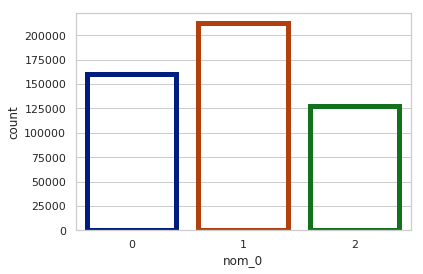

In [22]:
CPlot('nom_0')

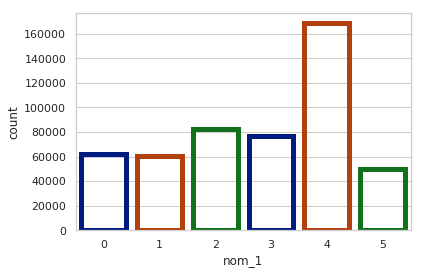

In [23]:
CPlot('nom_1')

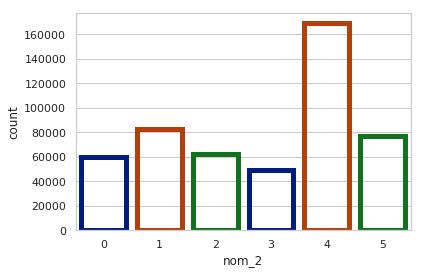

In [24]:
CPlot('nom_2')

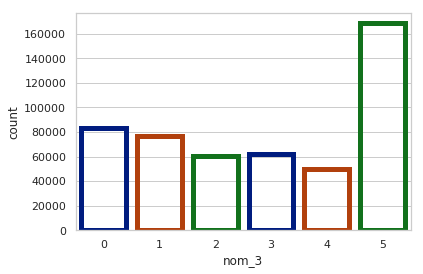

In [25]:
CPlot('nom_3')

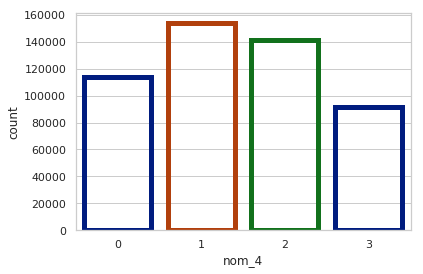

In [26]:
CPlot('nom_4')

_____

for nom_5 & nom_6 , let's have a look to their unique values

In [27]:
Unique('nom_5')

Number of unique vaure are 222 which are : 
 ['50f116bcf', 'b3b4d25d0', '3263bdce5', 'f12246592', '5b0f5acd5', '46cab09da', 'be5592604', '72f8028dc', '4604905e7', 'ad95dc0ee', '2ff007c26', 'a35c346aa', 'dbfb714a4', 'e1558b071', '39647c92a', 'ee55b9d67', '416a8f3ab', '91bde92fa', '3aa9329e2', '568550f04', 'caf83c0b5', '908a1b9c9', 'e844a1f66', 'dbc448931', '2979f0d45', '96c73114c', 'b7bb45938', '7da3e4aec', 'be4578201', 'dc07effb0', '88917a066', 'f2d59cf51', '5d18641ff', '9347491f2', '475e79160', 'e70a6270d', '5b1a9f841', 'e0efe9d20', 'd1b1709e8', '9bb7ea2da', '6fec43dd8', '0dee9b39a', '527ded12a', '321bf770e', 'f7821e391', '0de4acd31', '185ba0a59', '4845cc770', 'bdb9fef4a', '3fef1a765', '2cc9e16b9', 'fd04a970f', '81f9d3312', '30a15b6bd', '8dcf8adfb', '83b38aa6b', '74bd42d5f', '5a94fc1d9', '4e1b529f6', '8d5d9f3db', '472efea17', '740fb99a9', '075ceb58b', '0ef5c1879', '640e1fdd5', 'a3f640358', 'c5725677e', '3b5632a0c', '534be2753', '30a530eab', '7ee26092e', 'c0534106d', '713ad10a7', '9ad6

In [28]:
Unique('nom_6')

Number of unique vaure are 522 which are : 
 ['3ac1b8814', 'fbcb50fc1', '0922e3cb8', '50d7ad46a', '1fe17a1fd', '29a854620', '3393a0f78', '55eed5058', '3e44d44eb', '8ed6221ae', '153316f52', '6ea52a806', '1795ef28b', '628f3170f', '08b282a6c', '395941181', 'd44f7245a', '78500847e', '9448b8e3b', '9b1c3c8b7', 'be5a0f5a9', '687eaba3e', '5d7c5c023', '92f461454', 'cd8e3a0a7', 'f24d83141', '16dfb662a', 'cefab1020', '508ff88dc', '6d2cd10c5', 'ddb583aa3', '2eadb68c5', '854f72f28', '42b1cc2fd', 'fa2bf5f22', '8fec7bc42', 'fc4518443', 'bc82e0ba0', '1ad744242', '5cbbea089', '8fb440e53', 'af9278b96', '180a3d6cb', 'e10910468', '2ed5a94b0', '2a22b315e', '55a24a71b', 'c3517eaeb', 'cf82b283d', '0b10fcecc', 'a028c07af', 'd213f48ed', '5a5e620b3', 'c023e914a', '9f53d30ad', '2d9852300', '8cc791aa8', '54474e8d8', '36df19a6e', '0bcb379d8', '7dd3f58e9', '975346729', '96c110558', '8bb163a87', 'df5b440ae', 'd760c59b0', 'e3396fbd5', 'f497b97d7', 'd405aebc1', '6c0354890', '8c9d16cc3', '9e0a099c7', 'fac5eff9e', 'c9ee

ok , we'll continue label encode them

In [29]:
for C in ['nom_5' , 'nom_6' , 'nom_7' , 'nom_8' , 'nom_9']: 
    enc  = LabelEncoder()
    enc.fit(X[C])
    X[C] = enc.transform(X[C])

how it looks

In [30]:
data.head()

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_03,bin_04
0,0,0,0,1,5,5,3,0,78,120,...,2,Grandmaster,Cold,h,D,kr,2,2,1,1
1,0,1,0,1,4,3,5,2,159,510,...,1,Grandmaster,Hot,a,A,bF,7,8,1,1
2,0,0,0,0,4,4,5,3,44,14,...,1,Expert,Lava Hot,h,R,Jc,7,2,0,1
3,0,1,0,2,4,5,0,1,209,165,...,1,Grandmaster,Boiling Hot,i,D,kW,2,1,0,1
4,0,0,0,2,4,4,0,1,90,61,...,1,Grandmaster,Freezing,a,R,qP,7,8,0,0


and it might not be helpful to plot features with very high number of unique values 

______

now to plot other features 

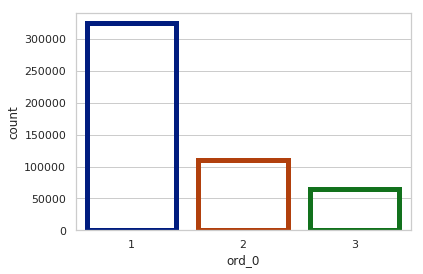

In [31]:
CPlot('ord_0')

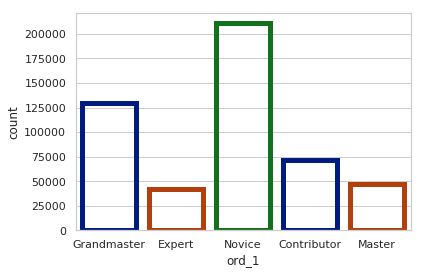

In [32]:
CPlot('ord_1')

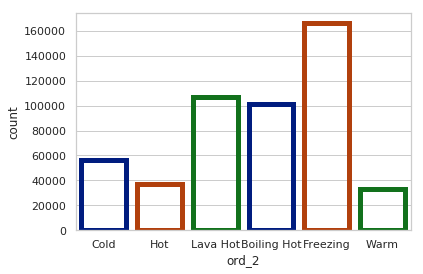

In [33]:
CPlot('ord_2')

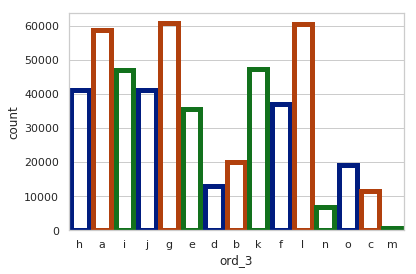

In [34]:
CPlot('ord_3')

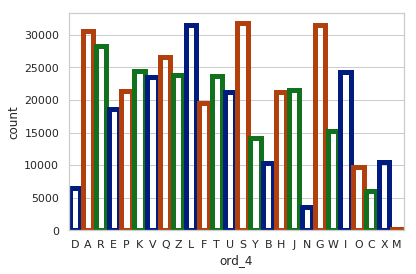

In [35]:
CPlot('ord_4')

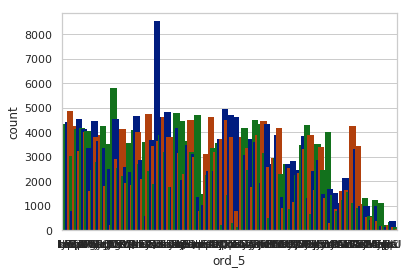

In [36]:
CPlot('ord_5')

 again to label encode them 

In [37]:
for C in ['ord_0' , 'ord_1' , 'ord_2' , 'ord_3' , 'ord_4' , 'ord_5']: 
    enc  = LabelEncoder()
    enc.fit(X[C])
    X[C] = enc.transform(X[C])

data.head()

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,bin_03,bin_04
0,0,0,0,1,5,5,3,0,78,120,...,1,2,1,7,3,136,2,2,1,1
1,0,1,0,1,4,3,5,2,159,510,...,0,2,3,0,0,93,7,8,1,1
2,0,0,0,0,4,4,5,3,44,14,...,0,1,4,7,17,31,7,2,0,1
3,0,1,0,2,4,5,0,1,209,165,...,0,2,0,8,3,134,2,1,0,1
4,0,0,0,2,4,4,0,1,90,61,...,0,2,2,0,17,158,7,8,0,0


so now we are ready for Build the model & train the data 

______

# Build the Model

first to prepare the data for training by defining trainging & testing data again 


In [38]:
train_data = data.iloc[:train.shape[0],:]
test_data=  data.iloc[train.shape[0]:,:]
train_data.shape , test_data.shape

((300000, 23), (200000, 23))

now to define X & y 

In [39]:
X = train_data
y = train['target']
X.shape , y.shape

((300000, 23), (300000,))

let's apply minmaxscalerfrom sklearn , to make the model faster 

In [40]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

then to split it into training & testing data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (240000, 23)
X_test shape is  (60000, 23)
y_train shape is  (240000,)
y_test shape is  (60000,)


now it's time to apply lgb classification model , with round numbers = 25K & shown parameters

In [42]:
num_round = 25000

parameters = {'num_leaves': 128,
             'min_data_in_leaf': 20, 
             'objective':'binary',
             'max_depth': 8,
             'learning_rate': 0.001,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 44,
             "metric": 'auc',
             "verbosity": -1}


traindata = lgb.Dataset(X_train, label=y_train)
testdata = lgb.Dataset(X_test, label=y_test)

LGBModel = lgb.train(parameters, traindata, num_round, valid_sets = [traindata, testdata],
                     verbose_eval=50, early_stopping_rounds = 600)


Training until validation scores don't improve for 600 rounds.
[50]	training's auc: 0.730515	valid_1's auc: 0.720815
[100]	training's auc: 0.732871	valid_1's auc: 0.72291
[150]	training's auc: 0.733857	valid_1's auc: 0.723761
[200]	training's auc: 0.734739	valid_1's auc: 0.724624
[250]	training's auc: 0.735546	valid_1's auc: 0.725326
[300]	training's auc: 0.736391	valid_1's auc: 0.725986
[350]	training's auc: 0.737663	valid_1's auc: 0.727058
[400]	training's auc: 0.73858	valid_1's auc: 0.727808
[450]	training's auc: 0.73981	valid_1's auc: 0.728873
[500]	training's auc: 0.74099	valid_1's auc: 0.729879
[550]	training's auc: 0.742309	valid_1's auc: 0.731003
[600]	training's auc: 0.743358	valid_1's auc: 0.731935
[650]	training's auc: 0.744532	valid_1's auc: 0.732985
[700]	training's auc: 0.745548	valid_1's auc: 0.733832
[750]	training's auc: 0.74659	valid_1's auc: 0.734748
[800]	training's auc: 0.747515	valid_1's auc: 0.735549
[850]	training's auc: 0.748496	valid_1's auc: 0.736407
[900]	tr

accuracy might be better by using more round numbers 

_____

now to predict test data , but first we have to apply same scaler model to test data

In [43]:
test = scaler.transform(test_data)
test.shape

(200000, 23)

ok , now predicting testing data

In [44]:
y_pred = LGBModel.predict(test)
y_pred.shape

(200000,)

how it looks like ? 

In [45]:
y_pred[:10]

array([0.32505138, 0.68199648, 0.23366187, 0.43170927, 0.74543851,
       0.3134455 , 0.43696868, 0.15819384, 0.53420662, 0.57305563])

great , now to open sample_submission , to read id columns from it

In [46]:
data = pd.read_csv('../input/cat-in-the-dat/sample_submission.csv')  

print(f'Test data Shape is {data.shape}')
data.head()

Test data Shape is (200000, 2)


,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


at last we concatenate id column with the result

In [47]:
idd = data['id']
FinalResults = pd.DataFrame(y_pred,columns= ['target'])
FinalResults.insert(0,'id',idd)
FinalResults.head()

,id,target
0,300000,0.325051
1,300001,0.681996
2,300002,0.233662
3,300003,0.431709
4,300004,0.745439


& export the result file

In [48]:
FinalResults.to_csv("sample_submission.csv",index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 